# Regression Linéaire sur un model plus complèxe

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

### Analyse dataset

In [50]:
df = pd.read_csv('ressources/datasets/salary_prediction_data.csv')
df.head()

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,High School,8,Urban,Manager,63,Male,84620.053665
1,PhD,11,Suburban,Director,59,Male,142591.255894
2,Bachelor,28,Suburban,Manager,61,Female,97800.255404
3,High School,29,Rural,Director,45,Male,96834.671282
4,PhD,25,Urban,Analyst,26,Female,132157.786175


In [51]:
print(f"Valeur(s) Null par colonne : \n{df.isna().sum()}")
df.info()

Valeur(s) Null par colonne : 
Education     0
Experience    0
Location      0
Job_Title     0
Age           0
Gender        0
Salary        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Education   1000 non-null   object 
 1   Experience  1000 non-null   int64  
 2   Location    1000 non-null   object 
 3   Job_Title   1000 non-null   object 
 4   Age         1000 non-null   int64  
 5   Gender      1000 non-null   object 
 6   Salary      1000 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 54.8+ KB


- le dataset est composé de 6 variables de prédictions : Education, Experience, Location, Job_Title, Age, Gender
- les variables Education, Location, Job_Title et Gender sont des strings
- Experience et Age sont des integers
- pas de valeurs null dans le dataset

In [52]:
df.describe()

,Experience,Age,Salary
count,1000.000000,1000.000000,1000.000000
mean,14.771000,42.377000,105558.404239
std,8.341111,13.609412,28256.972075
min,1.000000,20.000000,33510.510669
25%,7.000000,30.000000,85032.141517
50%,15.000000,43.000000,104314.518315
75%,22.000000,55.000000,126804.047524
max,29.000000,64.000000,193016.602150


<function matplotlib.pyplot.show(close=None, block=None)>

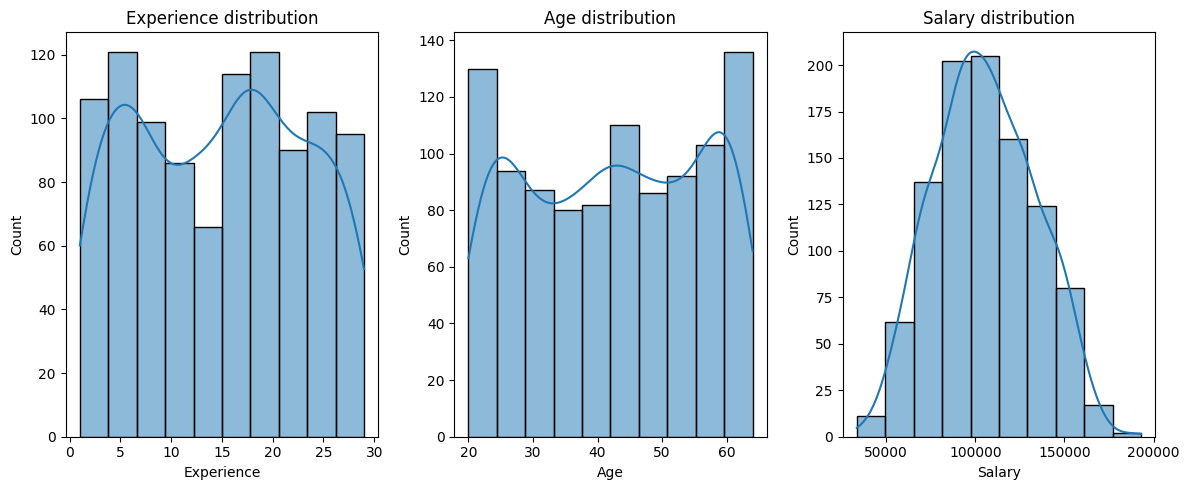

In [53]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['Experience'], bins=10, kde=True)
plt.title('Experience distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['Age'], bins=10, kde=True)
plt.title('Age distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['Salary'], bins=10, kde=True)
plt.title('Salary distribution')

plt.tight_layout()
plt.show

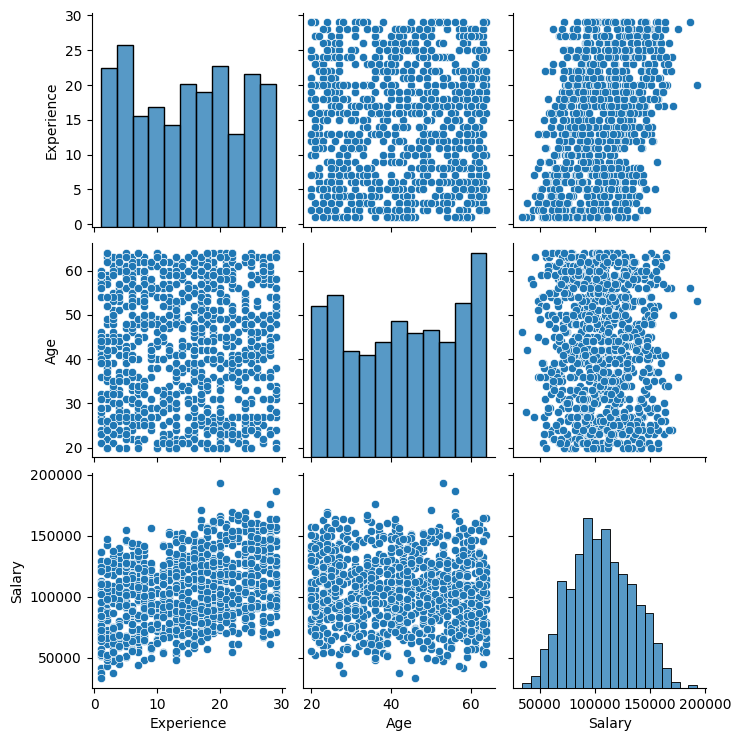

In [54]:
sns.pairplot(df)

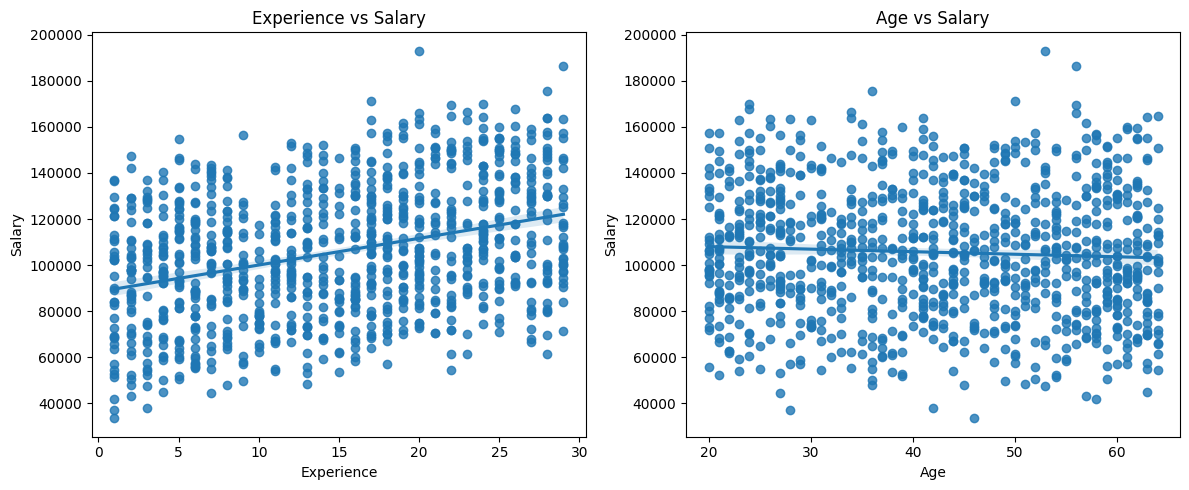

In [55]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.regplot(x='Experience', y='Salary', data=df)
plt.title('Experience vs Salary')

plt.subplot(1, 2, 2)
sns.regplot(x='Age', y='Salary', data=df)
plt.title('Age vs Salary')

plt.tight_layout()
plt.show()

- il ne semble pas y avoir de distribution normal ni spécifiquement d'influence notable de la part des variables Experience et Age sur le salaire
- la relation entre nos prédicteurs et notre target est difficile à interprèter

## Adaptation des données

In [56]:
df_numerical = df.select_dtypes(include=['int64'])
df_numerical.head()

,Experience,Age
0,8,63
1,11,59
2,28,61
3,29,45
4,25,26


- on normalise les données numériques Experience et Age (pas la targe Salaire) afin qu'elles soient au même niveau (à la même échelle) afin d'éviter que le model n'accorde plus d'important à l'age

In [57]:
df_categorical = df.select_dtypes(include=['object'])
df_categorical.head()

,Education,Location,Job_Title,Gender
0,High School,Urban,Manager,Male
1,PhD,Suburban,Director,Male
2,Bachelor,Suburban,Manager,Female
3,High School,Rural,Director,Male
4,PhD,Urban,Analyst,Female


In [58]:
scaler = MinMaxScaler()
df_numerical_scaled = pd.DataFrame(scaler.fit_transform(df_numerical), columns=df_numerical.columns, index=df_numerical.index)

print(f"Valeurs min/max : {df_numerical_scaled['Experience'].min()} ; {df_numerical_scaled['Experience'].max()}")
print(f"Valeurs min/max : {df_numerical_scaled['Age'].min()} ; {df_numerical_scaled['Age'].max()}")

df_numerical_scaled.head()

Valeurs min/max : 0.0 ; 0.9999999999999999
Valeurs min/max : 0.0 ; 1.0


,Experience,Age
0,0.250000,0.977273
1,0.357143,0.886364
2,0.964286,0.931818
3,1.000000,0.568182
4,0.857143,0.136364


In [59]:
features_cat = df_categorical.columns

for f in features_cat:
    print(f"La variable '{f}' contient {df_categorical[f].nunique()} valeurs différentes")

La variable 'Education' contient 4 valeurs différentes
La variable 'Location' contient 3 valeurs différentes
La variable 'Job_Title' contient 4 valeurs différentes
La variable 'Gender' contient 2 valeurs différentes


- On verifie ici combien de variables contiennent nos catégories. Ici il y en a peu (entre 2 et 4).
- Si nos catégories avaient un nombre plus important de variable, il aurait fallut adopter une approche différentes pour traiter ces prédicateurs. En effet, cela peut amener à un model plus complèxe, plus difficile à interprèter.
- On aurait par exemple, pus cibler les variables les plus présentes uniquement (Réduction de Catégorie)

In [60]:
df_dummies = pd.get_dummies(df_categorical, drop_first=True).astype(int)
df_dummies.head()

,Education_High School,Education_Master,Education_PhD,Location_Suburban,Location_Urban,Job_Title_Director,Job_Title_Engineer,Job_Title_Manager,Gender_Male
0,1,0,0,0,1,0,0,1,1
1,0,0,1,1,0,1,0,0,1
2,0,0,0,1,0,0,0,1,0
3,1,0,0,0,0,1,0,0,1
4,0,0,1,0,1,0,0,0,0


In [61]:
df_final = pd.concat([df_numerical_scaled, df_dummies], axis=1)
display(df_final[:3])
display(df[:3])

,Experience,Age,Education_High School,Education_Master,Education_PhD,Location_Suburban,Location_Urban,Job_Title_Director,Job_Title_Engineer,Job_Title_Manager,Gender_Male
0,0.250000,0.977273,1,0,0,0,1,0,0,1,1
1,0.357143,0.886364,0,0,1,1,0,1,0,0,1
2,0.964286,0.931818,0,0,0,1,0,0,0,1,0


,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,High School,8,Urban,Manager,63,Male,84620.053665
1,PhD,11,Suburban,Director,59,Male,142591.255894
2,Bachelor,28,Suburban,Manager,61,Female,97800.255404


- On génère notre nouveau DataFrame avec les données numériques normalisés et les données catégoriques variabilisés

In [62]:
x_train, x_test, y_train, y_test = train_test_split(df_final, df['Salary'], test_size=0.2, random_state=0)

print(f"Train dataset size --> x : {x_train.shape[0]}; y : {y_train.shape[0]}")
print(f"Test dataset size --> x : {x_test.shape[0]}; y : {y_test.shape[0]}")

Train dataset size --> x : 800; y : 800
Test dataset size --> x : 200; y : 200


### Interprétation des données

Questions ausquels on pourrait essayer de répondre :
- quelle catégorie de personne gagne de plus ? Ou quelle tranche d'age gagne le plus ?
- quelle tranche d'age ou quel sexe de personne gagne le plus ? ou le moins ?
- quelle tranche d'age ou de sexe de personne ont des postes à responsabilités ?
- dans quels lieux on a les personnes qui gagnent le plus ? le moins ?
- donner le salaire moyen selon le diplome obtenu ?

Quelle tranche d'age gagne le plus ?

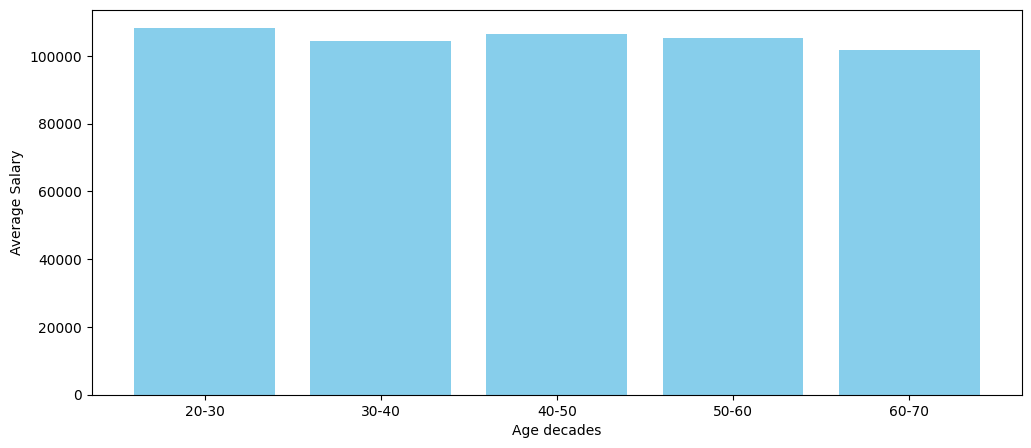

Les personnes agés entre 20-30 ont les plus gros salaires (en moyenne 108192.85)


In [106]:
age_bracket = [(20, 30), (30, 40), (40, 50), (50, 60), (60, 70)]
age_list = ['20-30', '30-40', '40-50', '50-60', '60-70']
bins = [20,30,40,50,60,70]
salary_max = []

df['Age_group'] = pd.cut(df['Age'], bins=bins, labels=age_list, right=False)
income_by_age_group = round(df.groupby('Age_group', observed=True)['Salary'].mean(),2)
income_by_age_group = income_by_age_group.reset_index()

#for age in age_bracket:
#    salaries = df.loc[df['Age'].between(age[0], age[1])]['Salary']
#    salary_max.append(salaries.mean())
#    print(f"Le max de salaire pour les personnes agés entre {age[0]} et {age[1]} est de {round(salaries.mean(), 2)}")

plt.figure(figsize=(12, 5))
plt.bar(age_list, income_by_age_group['Salary'].values, color='skyblue')
plt.xlabel('Age decades')
plt.ylabel('Average Salary')
plt.show()

max_salary = income_by_age_group['Salary'].max()
age_group = income_by_age_group.loc[income_by_age_group['Salary'] == max_salary]['Age_group'].values[0]
print(f"Les personnes agés entre {age_group} ont les plus gros salaires (en moyenne {max_salary})")

Observations: les plus gros salaires sont détenus parles personnes agées entre 20 et 30 ans.

Qui gagne le plus entre les hommes et les femmes par tranche d'age ?

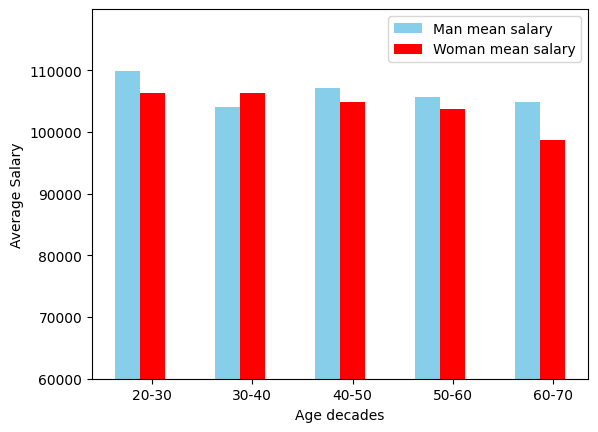

In [156]:
df_sexe = df.groupby('Age_group', observed=True )
list_salary_by_gender = {}

for age in age_bracket:
    df_age_slice = df.loc[df['Age'].between(age[0], age[1])]
    man_salary_mean = df_age_slice.loc[df['Gender'] == 'Male']['Salary'].mean()
    woman_salary_mean = df_age_slice.loc[df['Gender'] == 'Female']['Salary'].mean()

    list_salary_by_gender[age_list[age_bracket.index(age)]] = (man_salary_mean, woman_salary_mean)
    #print(f"Parmis les personnes agés entre {age[0]} et {age[1]} --> les hommes gagnent en moyenne {man_salary_mean} et les femmes {woman_salary_mean}")

man_salaries = [salary[0] for salary in list_salary_by_gender.values()]
woman_salaries = [salary[1] for salary in list_salary_by_gender.values()]

fig, ax = plt.subplots()
ax.bar(np.arange(len(list_salary_by_gender.keys())), man_salaries, color='skyblue', label='Man mean salary', width=0.25)
ax.bar(np.arange(len(list_salary_by_gender.keys())) + 0.25, woman_salaries, color='red', label='Woman mean salary', width=0.25)

ax.set_xticks(np.arange(len(list_salary_by_gender.keys())) + 0.25)
ax.set_xticklabels(list_salary_by_gender.keys())

ax.set_xlabel('Age decades')
ax.set_ylabel('Average Salary')
ax.set_ylim(60000, max(max(man_salaries), max(woman_salaries)) + 10000)
ax.legend()

plt.show()

En moyenne les femmes gagnent moins que les hommes, excepté pour les personnes agées entre 30 et 40 ans.

- Pourquoi la différence dans le salaire entre les hommes et les femmes suit elle une tendance excepté pour les 30-40 ans ?
    - Y a t'il plus de femmes que d'hommes pour cette tranche d'age ?
    - Les femmes ont un métier bien spécifique ? Ou un diplome bien particulier ? 


Parmis les personnes agés entre 30 et 40 ans, il y a 84 femmes et 98 hommes


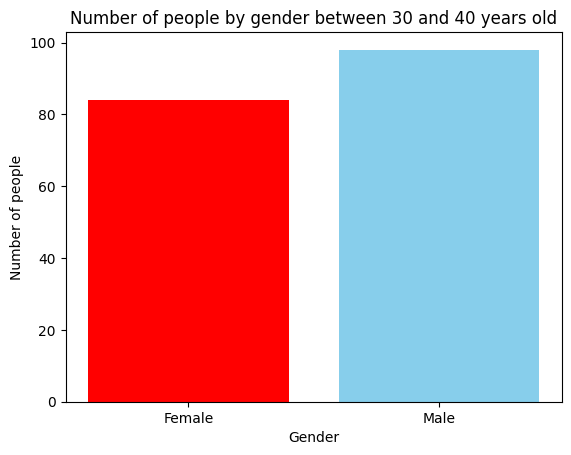

In [165]:
df_age_30_40 = df.loc[df['Age_group'] == '30-40']

n_woman = len(df_age_30_40.loc[df_age_30_40['Gender'] == 'Female'])
n_man = len(df_age_30_40.loc[df_age_30_40['Gender'] == 'Male'])

print(f"Parmis les personnes agés entre 30 et 40 ans, il y a {n_woman} femmes et {n_man} hommes")

plt.subplot()
plt.bar(["Female", "Male"], [n_woman, n_man], color=['red', 'skyblue'])
plt.xlabel("Gender")
plt.ylabel("Number of people")
plt.title("Number of people by gender between 30 and 40 years old")
plt.show()

Il y a moins de femme que d'homme, le fait que les femmes gagnent plus que les hommes dans cette tranche d'age n'est pas dû à leur nombre.

### Génération du Model